# Preprocessing: Data Scaling  
      

Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from env import get_db_url
import wrangle as w
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire and prepares data and returns clean data frame

df = w.wrangle_zillow()


In [3]:
df.head()

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
4,2005,4,2.0,3633,296425,6941.39,LA
6,2011,3,4.0,1620,847770,10244.94,LA
7,1926,3,2.0,2077,646760,7924.68,LA
11,1972,0,0.0,1200,5328,91.60,LA
14,1973,0,0.0,171,6920,255.17,LA


In [4]:
#split data
train, validate, test = w.split_data(df)


train: 1284141 (60.0% of 2140235)
validate: 428047 (20.0% of 2140235)
test: 428047 (20.0% of 2140235)


In [5]:
# check info on train data
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 462820 to 778196
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   year            1284141 non-null  int64  
 1   bedrooms        1284141 non-null  int64  
 2   bathrooms       1284141 non-null  float64
 3   square_feet     1284141 non-null  int64  
 4   property_value  1284141 non-null  int64  
 5   property_tax    1284141 non-null  float64
 6   county          1284141 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 78.4+ MB


# 1 Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
# creating a copy of the train DataFrame 
train_scaled = train.copy()


In [8]:
#columns to scale
columns_to_scale = ['bedrooms','bathrooms','square_feet','property_tax']


In [11]:
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [12]:
# check out original data
train.head()

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
462820,2005,5,4.0,3011,710674,7561.14,Ventura
3880,1961,3,2.0,1682,603333,7086.19,LA
992263,1954,4,2.0,1433,82804,1134.83,LA
311722,1999,3,2.5,2001,355444,4174.92,Ventura
787985,1962,4,2.0,2277,571000,7113.02,LA


In [13]:
# check out new scaled data
train_scaled.head()

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
462820,2005,0.277778,0.125000,0.005667,710674,0.007001,Ventura
3880,1961,0.166667,0.062500,0.003165,603333,0.006561,LA
992263,1954,0.222222,0.062500,0.002696,82804,0.001040,LA
311722,1999,0.166667,0.078125,0.003766,355444,0.003860,Ventura
787985,1962,0.222222,0.062500,0.004285,571000,0.006585,LA


Text(0, 0.5, 'Count')

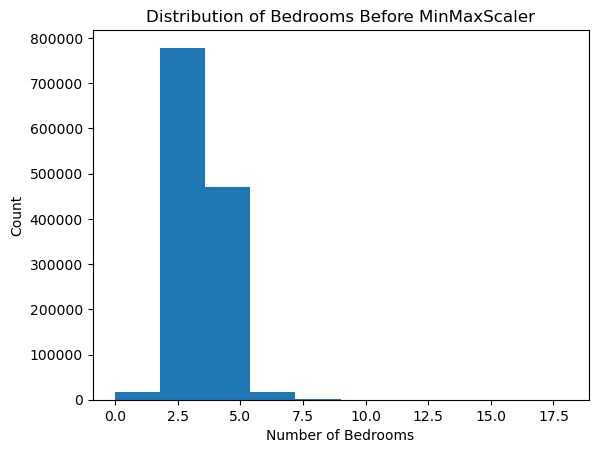

In [14]:
# Plot a histogram of the 'bedrooms' feature before applying MinMaxScaler
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

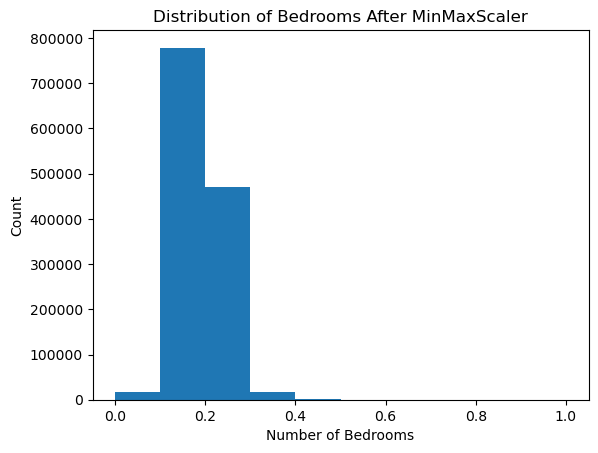

In [15]:
# Plot a histogram of the 'bedrooms' feature after applying MinMaxScaler
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')


In [18]:
# Create subplot structure for before-and-after scaling visualization
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

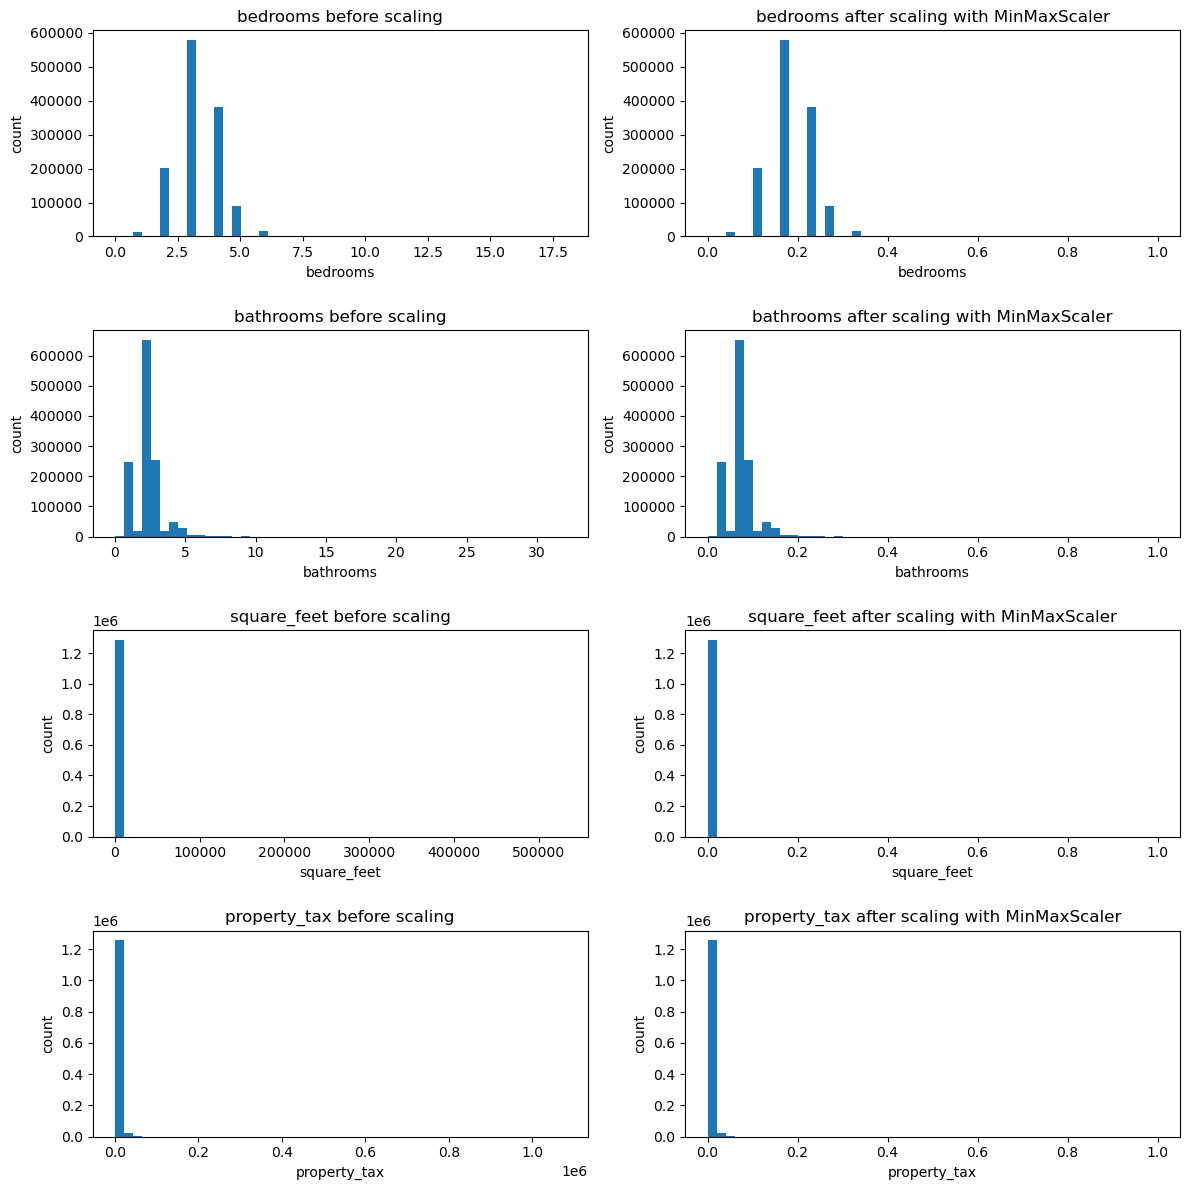

In [17]:
# call function with minmax

visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)
                 

Standardization (Z-score Scaling)

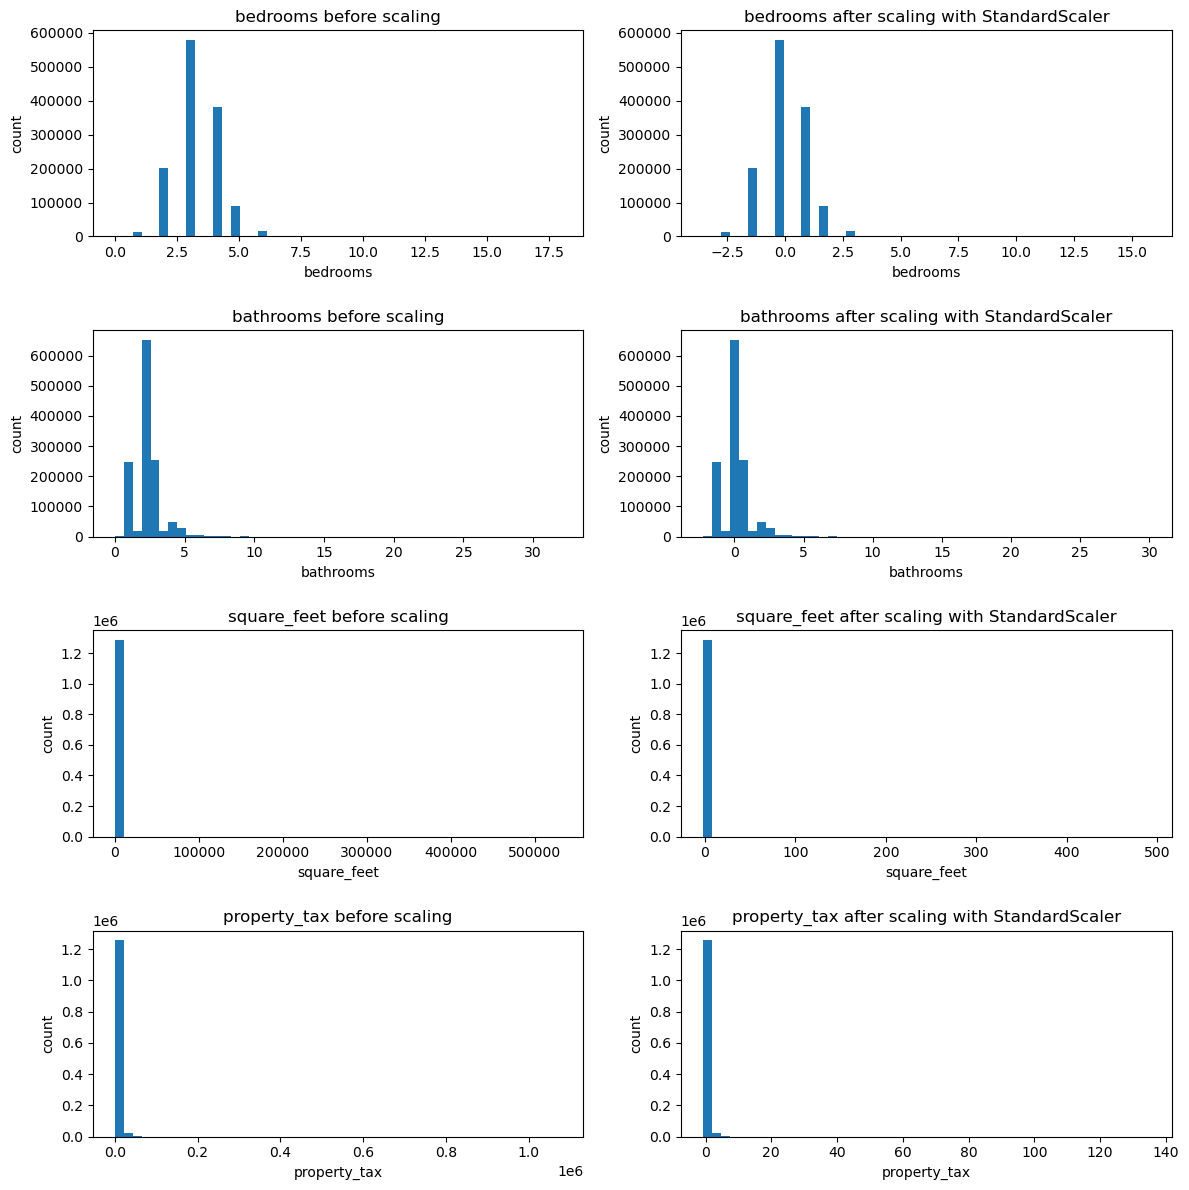

In [24]:
# call function with standard scaler
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)
                 

Robust Scaling

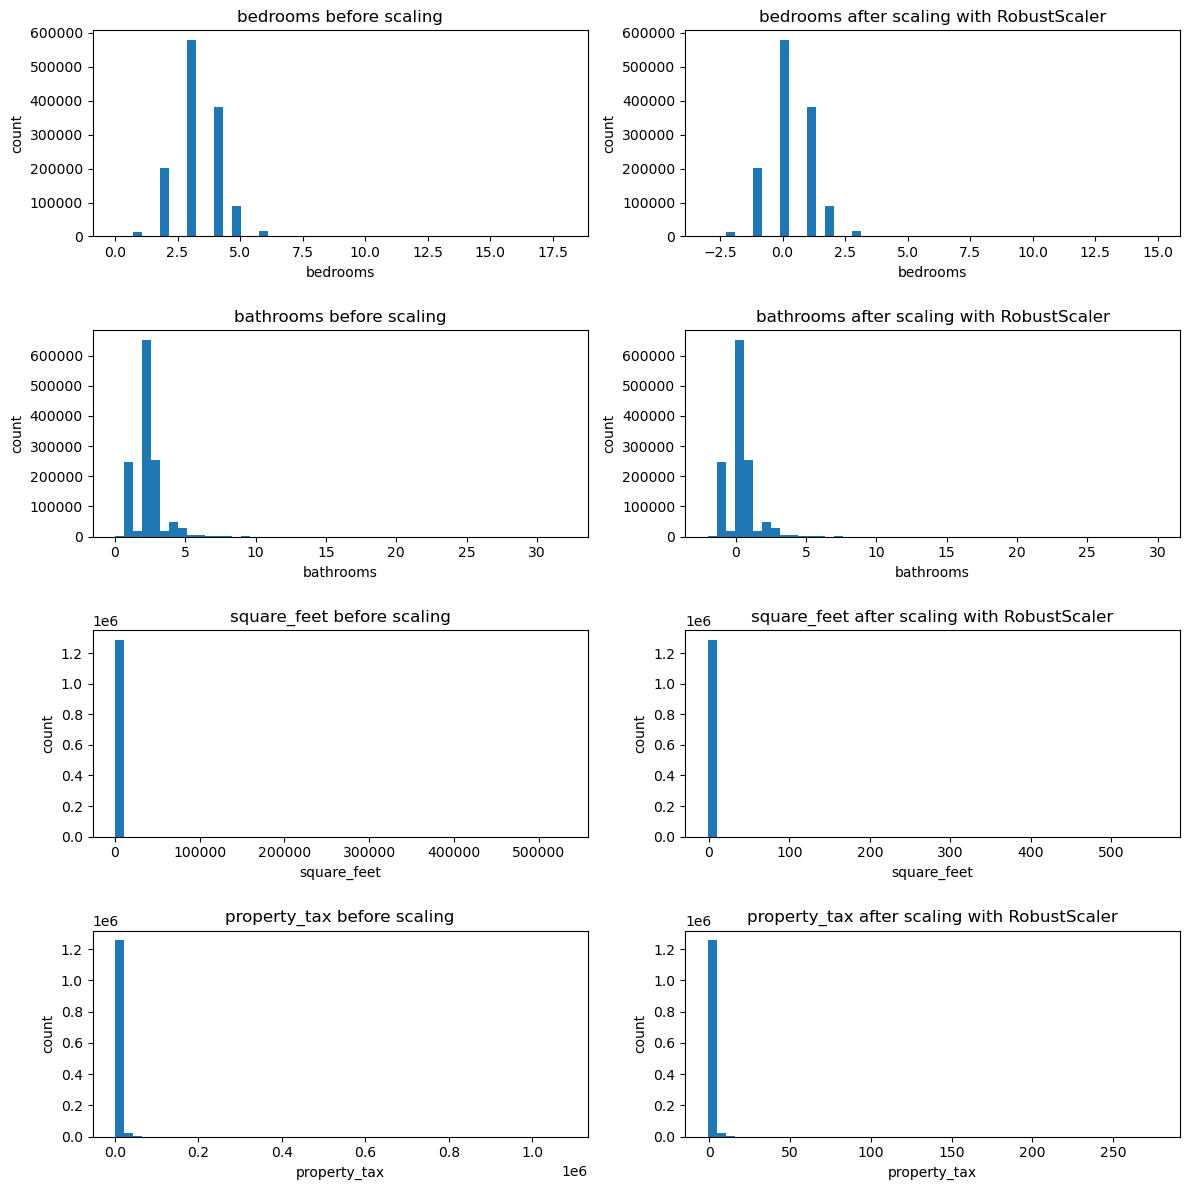

In [25]:
# call function with robustscaler
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


# 2 Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

By using .inverse_transform, you can convert the scaled data back to its original scale for easier interpretation.

In [16]:
# check out unscaled columns 
train[columns_to_scale].head()

,bedrooms,bathrooms,square_feet,property_tax
462820,5,4.0,3011,7561.14
3880,3,2.0,1682,7086.19
992263,4,2.0,1433,1134.83
311722,3,2.5,2001,4174.92
787985,4,2.0,2277,7113.02


In [10]:
#make it
scaler = MinMaxScaler()

#fit and use it
train_scaled = scaler.fit_transform(train[columns_to_scale])

#convert to df
train_scaled = pd.DataFrame(train_scaled, columns=columns_to_scale)


In [14]:
#to see scaled data
train_scaled.head()

,bedrooms,bathrooms,square_feet,property_tax
0,0.277778,0.125000,0.005667,0.007001
1,0.166667,0.062500,0.003165,0.006561
2,0.222222,0.062500,0.002696,0.001040
3,0.166667,0.078125,0.003766,0.003860
4,0.222222,0.062500,0.004285,0.006585


In [15]:
#appling the inverse_transform function to the scaled data
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled


array([[5.000000e+00, 4.000000e+00, 3.011000e+03, 7.561140e+03],
       [3.000000e+00, 2.000000e+00, 1.682000e+03, 7.086190e+03],
       [4.000000e+00, 2.000000e+00, 1.433000e+03, 1.134830e+03],
       ...,
       [5.000000e+00, 3.000000e+00, 1.903000e+03, 3.924330e+03],
       [4.000000e+00, 4.500000e+00, 3.672000e+03, 1.302986e+04],
       [2.000000e+00, 1.000000e+00, 8.200000e+02, 8.499300e+02]])

In [13]:
#converting 2d array to df and adding column names
inverted_train = pd.DataFrame(inverse_train_scaled, columns=columns_to_scale)
inverted_train

,bedrooms,bathrooms,square_feet,property_tax
0,5.0,4.0,3011.0,7561.14
1,3.0,2.0,1682.0,7086.19
2,4.0,2.0,1433.0,1134.83
3,3.0,2.5,2001.0,4174.92
4,4.0,2.0,2277.0,7113.02
...,...,...,...,...
1284136,3.0,2.0,1452.0,4009.01
1284137,4.0,3.0,2674.0,4248.88
1284138,5.0,3.0,1903.0,3924.33
1284139,4.0,4.5,3672.0,13029.86


# 3 Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

When you specify 'normal', the QuantileTransformer transforms your data to follow a normal (Gaussian) distribution. This means that the resulting data should have properties similar to a standard normal distribution, such as a mean of 0 and a standard deviation of 1.
Achieving a true normal distribution may not always be possible, especially if your original data has extreme outliers or other non-Gaussian characteristics. The transformation will attempt to make the data as close to normal as possible.

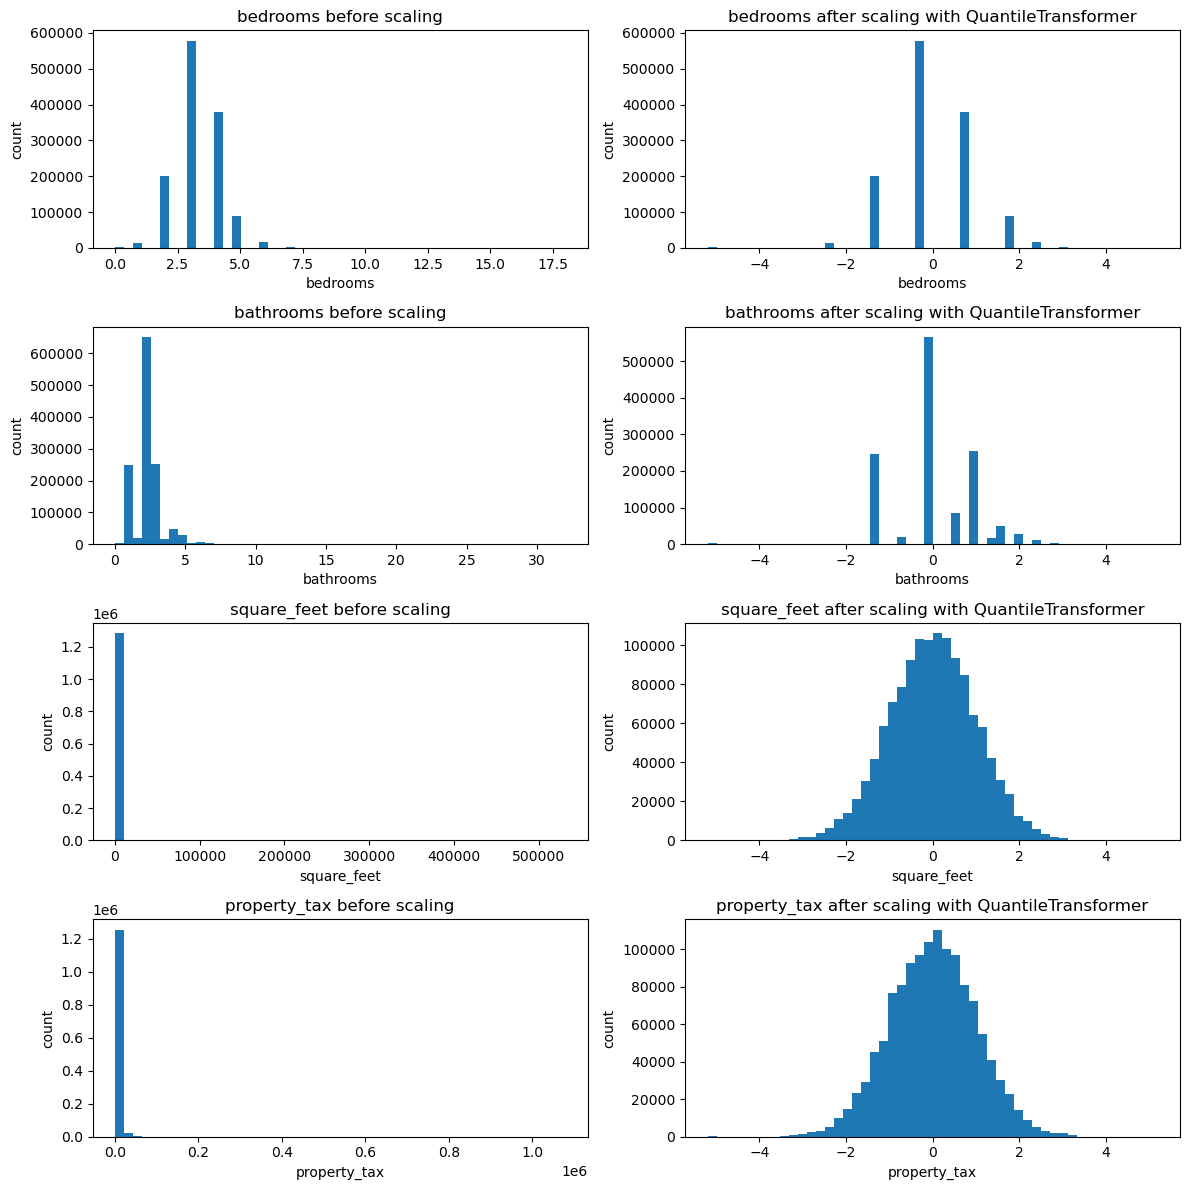

In [19]:
# call function using QuantileTransformer

visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50) 


Noticed that with 'normal', the transformed data will be closer to a normal distribution. The histogram of the transformed data may resemble a bell curve centered around zero.

# 4 Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


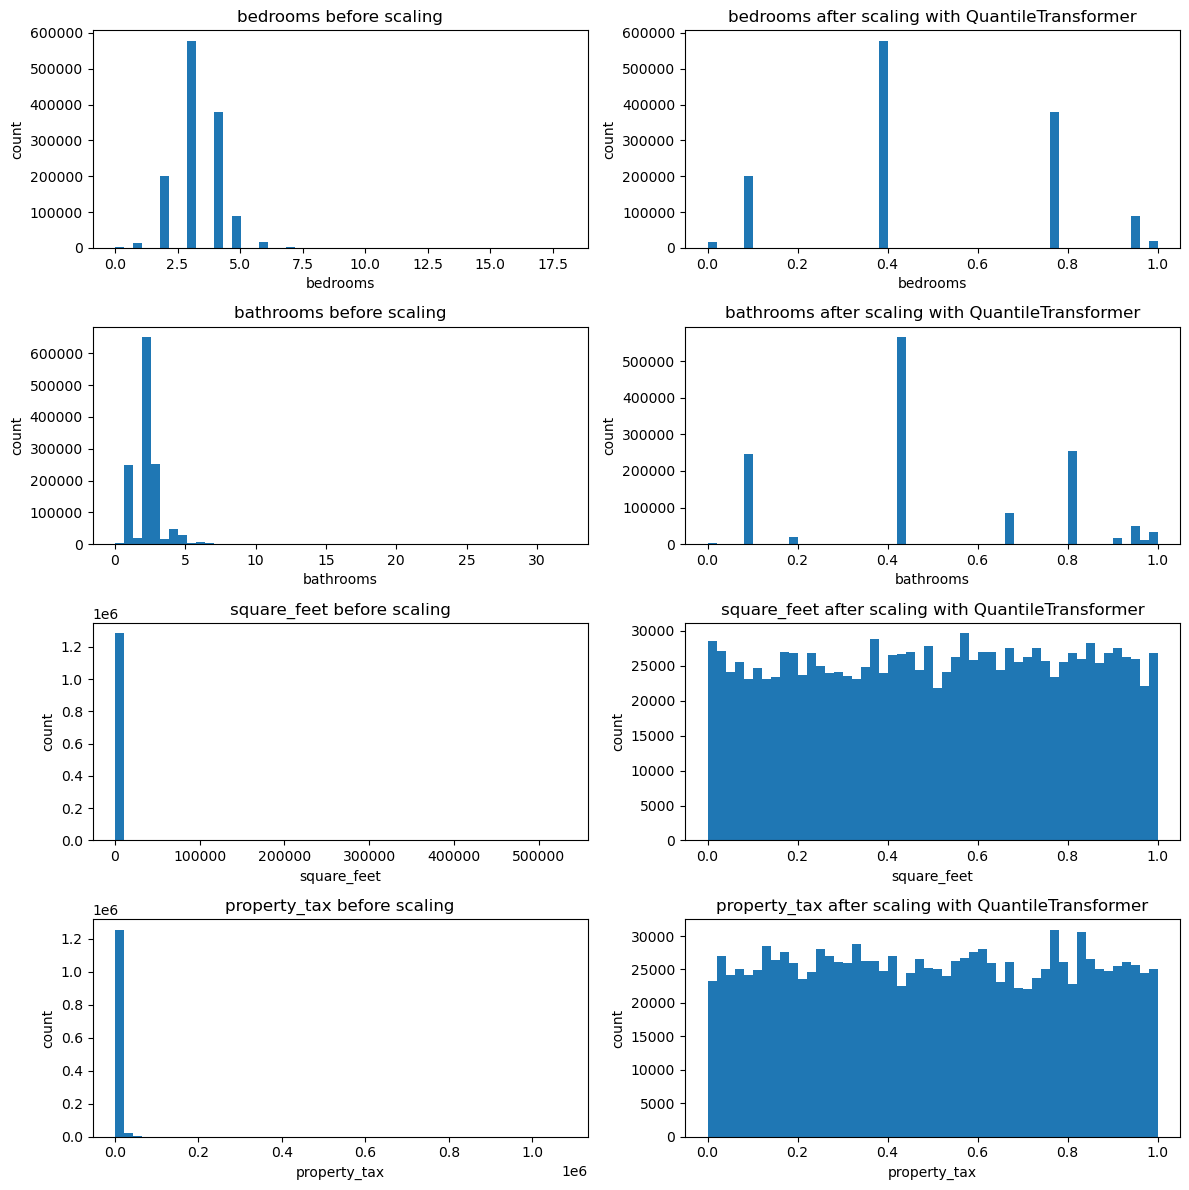

In [21]:
# call function using quantile transformer

visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)


When we omit output_distribution='normal' then by default it becomes output_distribution='uniform'(default)
 > the QuantileTransformer transforms your data into a uniform distribution, meaning that each quantile (percentile) of the original data will be uniformly spaced. This option often stretches or compresses the data to fit within a uniform range, but it may not necessarily follow a perfect normal (Gaussian) distribution.
The transformation is monotonically increasing, preserving the order of the data.

Noticed that With 'uniform', you may see that the transformed data is stretched or compressed to occupy a uniform range of values. The distribution may not resemble a normal distribution, especially if your original data had skewness or other non-uniform characteristics.

# 5 Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [6]:
# check out train data
train.head()

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
462820,2005,5,4.0,3011,710674,7561.14,Ventura
3880,1961,3,2.0,1682,603333,7086.19,LA
992263,1954,4,2.0,1433,82804,1134.83,LA
311722,1999,3,2.5,2001,355444,4174.92,Ventura
787985,1962,4,2.0,2277,571000,7113.02,LA


In [13]:
# Function to preprocess your data by scaling it while ensuring that the scaling parameters are 
# learned from the training data and applied consistently to all splits (training, validation, and test).
def scale_data(train, 
               validate, 
               test, 
               to_scale = ['bedrooms','bathrooms','square_feet','property_tax'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[to_scale])
    # applying the scaler:
    train_scaled[to_scale] = pd.DataFrame(scaler.transform(train[to_scale]),
                                                  columns=train[to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[to_scale] = pd.DataFrame(scaler.transform(validate[to_scale]),
                                                  columns=validate[to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[to_scale] = pd.DataFrame(scaler.transform(test[to_scale]),
                                                 columns=test[to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [14]:
# use function
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)


In [15]:
# scaler = True, returns scaler object
scaler

MinMaxScaler()

In [16]:
# check out scaled train data
train_scaled

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
462820,2005,0.277778,0.125000,0.005667,710674,0.007001,Ventura
3880,1961,0.166667,0.062500,0.003165,603333,0.006561,LA
992263,1954,0.222222,0.062500,0.002696,82804,0.001040,LA
311722,1999,0.166667,0.078125,0.003766,355444,0.003860,Ventura
787985,1962,0.222222,0.062500,0.004285,571000,0.006585,LA
...,...,...,...,...,...,...,...
1966409,1963,0.166667,0.062500,0.002732,312978,0.003706,LA
1248263,1979,0.222222,0.093750,0.005033,417545,0.003929,Orange
28211,1965,0.277778,0.093750,0.003581,300584,0.003628,LA
279547,2001,0.222222,0.140625,0.006912,1115000,0.012074,Orange


In [17]:
# check out scaled validate data
validate_scaled

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
553175,1924,0.277778,0.125000,0.007334,2749023,0.030702,LA
334836,1959,0.222222,0.093750,0.003692,376865,0.004416,LA
835173,1967,0.222222,0.062500,0.003764,708000,0.008090,LA
666536,1989,0.222222,0.093750,0.002909,279285,0.002583,Orange
1636553,1959,0.166667,0.046875,0.002805,61572,0.000852,Orange
...,...,...,...,...,...,...,...
564589,1938,0.111111,0.031250,0.002071,333300,0.003909,LA
545380,1977,0.222222,0.062500,0.003643,478092,0.005550,LA
818066,1954,0.222222,0.062500,0.002563,167055,0.001944,Orange
785346,1998,0.166667,0.078125,0.003029,544439,0.006054,Orange


In [18]:
# check out scaled test data
test_scaled 

,year,bedrooms,bathrooms,square_feet,property_value,property_tax,county
1656157,1959,0.222222,0.062500,0.003560,114668,0.001440,Orange
1948549,1950,0.111111,0.031250,0.002655,75656,0.000801,Ventura
1691317,1953,0.166667,0.062500,0.002250,406000,0.009663,LA
1618983,1936,0.222222,0.093750,0.004457,1441578,0.015316,LA
1199756,1965,0.222222,0.156250,0.006554,1277065,0.013500,LA
...,...,...,...,...,...,...,...
196820,1959,0.222222,0.062500,0.003178,144921,0.001655,LA
311941,2005,0.222222,0.140625,0.008492,1517000,0.020777,Orange
1411076,1997,0.277778,0.093750,0.005451,545210,0.005487,Ventura
299892,1994,0.166667,0.078125,0.005526,559434,0.005784,Orange
